<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성공학과 규제
* 다중회귀

여러개의 특성을 사용하는 회귀모델이다. 특성이 많을수록 선형 모델의 성능이 좋아진다.

* 특성 공학

주어진 특성을 조합해서 새로운 특성을 만드는 일련의 작업과정이다.

* 릿지

규제가 있는 선형 회귀 모델이다. 선형 모델의 계수를 작게 만들어 과대적합을 완화시킨다. 보통 릿자 규제를 많이 쓴다.

* 라쏘

릿지처럼 규제가 있는 선형 회귀모델이다. 릿지와 달리 계수를 0으로 만들 수도 있다.

* 하이퍼파라미터

머신러닝 알고리즘이 학습하지 않는 파라미터이다. (사전에 직접 설정해줘야함)
대표적으로 릿지와 라쏘의 규제강도 alpha 파라미터이다.

* read_csv() : csv파일을 판다스 데이터프레임으로 변환하는 함수이다.
  * sep: 파일의 구분자/ 기본값은 콤마(,)
  * header: 데이터프레임의 열 이름으로 사용할 csv 파일의 행 번호를 지정한다. 기본적으론 첫번째 행을 열 이름으로 사용한다.
  * skiprows: 파일 읽기전 건너뛸 행의 개수
  * nrow: 파일에서 읽을 행의 개수
  
* PolynomialFeatures : 주어진 특성을 조합하여 새로운 특성을 만든다.
  * degree: 최고 차수를 정함/ 기본값은 2
  * intersection_only=True 로 지정하면 거듭제곱항은 제외,특성간의 곱셈항만 추가됨
  * include_bias=False 로 지정하면 절편의 특성이 제외된다.
  
* Ridge

규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련한다.

매개변수 alpha로 강도를 조절하고 값이 클수록 규제가 세진다.(기본값=1)

매개변수 solver로 최적의 모델을 찾을 수 있다.(기본값=auto)

solver=sag,saga 이면 확률적 평균 경사 하강법 알고리즘을 쓴다.( 특성과 샘플 수가 많을 때 좋음)(이때, random_state도 설정할 수 있음)

* Lasso

규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련한다.

최적의 모델을 찾기 위해 좌표 하강법을 사용한다.

max_iter는 알고리즘의 수행반복횟수를 지정한다( 기본값=1000)

In [ ]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

.to_numpy() 또는 .values 를 사용해서 DataFrame을 numpy배열로 변환할 수 있다.

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(42, 9)


특성을 만들거나 전처리하기위해 필요한 클래스를 변환기라고 부름

변환기  메서드 : fit(),transform()

* poly.transform([[2,3]]) = [[1. 2. 3. 4. 6. 9.]]

   [절편 , 2 , 3 , 2^2, 2*3 , 3^2]

* include_bias=False는  절편 무시( 사실 기본값도 False라서 지정안해줘도됨 )


In [ ]:
print(train_poly.shape)
poly.get_feature_names()

test_poly=poly.transform(test_input)

(42, 9)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


* train_poly.shape 가 (42,9)인 이유

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(test_poly,test_target))
print(lr.score(train_poly,train_target))

0.9714559911594132
0.9903183436982124


특성을 늘리니 과소적합 문제 해결!

In [ ]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly,train_target)
print(lr.score(test_poly,test_target))
print(lr.score(train_poly,train_target))

(42, 55)
-144.40579242335605
0.9999999999991096


* degree 기본값은 2

* 특성의 개수를 데이터의 양에 비해 크게 설정을 한다면 과대적합됨


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

* 규제하기전에 특성과 스케일을 정규화시켜야함
* 표준점수로 변환한 train_scaled 와 test_scaled

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615397


과대적합 릿지모델로 해결

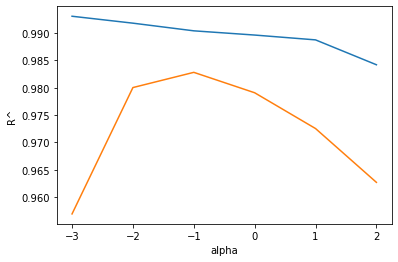

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^')
plt.show()

* 릿지모델로 얼마나 규제할 것인가는 alpha로 정할 수 있음
* 적절한 alpha값을 찾는 방법은 alpha에 따른 결정계수값의 그래프를 그려보는것
* 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 good alpha!!
* alpha가 -1 즉,10^-1=0.1 일때 규제하기 최고의 alpha값

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386927


굿!!

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.645e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.015e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


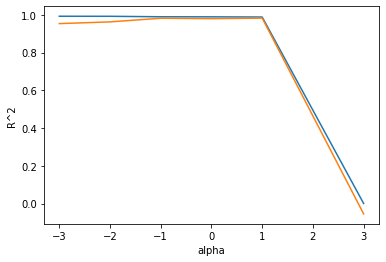

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso=Lasso()

train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,1000]

for alpha in alpha_list:
  lasso=Lasso(alpha=alpha,max_iter=30000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 라쏘 모델을 훈련할때는 최적의 계수를 찾기 위해 반복적인 계산을 수행한다. max_iter값을 충분히 늘려줬다.
* 최적의 alpha 값은 1 즉 10^1=10 일때다

In [ ]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


good!!